### Imports

In [18]:
from general_utils import *
from pmat_rohn_v1_utils import *
from pmat_rohn_v2_utils import *
from pmat_tsatsomeros_utils import *
from tqdm import tqdm

import numpy as np
from math import *
import sympy
import random
# from lemke import *
import seaborn as sns
from matplotlib import pyplot as plt
import timeit

metallic_gold = (0.83, 0.69, 0.22)
glaucous_blue = (0.38, 0.51, 0.71)

## Normalized Wigner matrix spectrum (Wigner distribution)

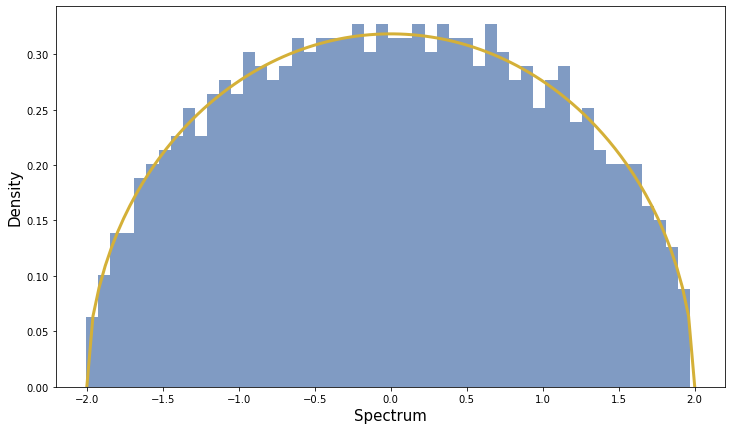

In [2]:
n = 1000
normalized_wigner = get_wigner((n,n)) / (sqrt(n))
plt.figure(figsize=(12,7))
plt.hist(np.linalg.eigvals(normalized_wigner), color = glaucous_blue, bins = 50, density = True, alpha = 0.8)
x = np.linspace(-2,2,100)
xx = np.sqrt( np.maximum(0, 4 - x**2) ) / (2*pi)
plt.plot(x, xx, color = metallic_gold, linewidth=3)
plt.xlabel("Spectrum", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
#plt.savefig("wigner_distr.png")
plt.show()

## Normalized large covariance matrix spectrum (Marcenko-Pastur distribution)

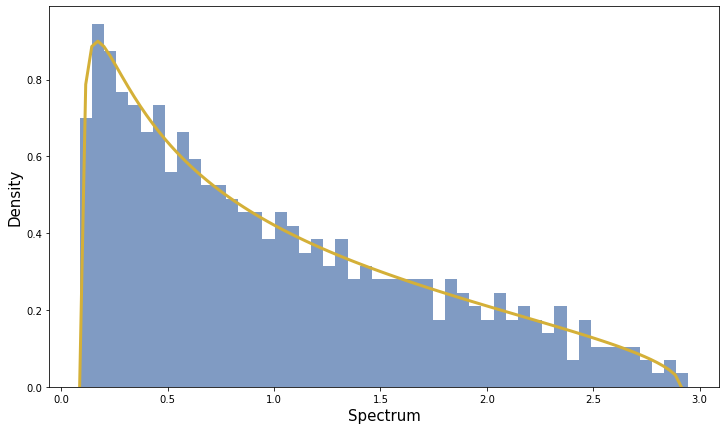

In [3]:
n = 1000
N = 500
c = N/n
lambda_plus = (1 + sqrt(c))**2
lambda_moins = (1 - sqrt(c))**2
rand_mat = np.random.normal(loc=0.0, scale=1.0, size=(N,n))
normalized_matrix = ( rand_mat @ rand_mat.T ) / n
plt.figure(figsize=(12,7))
plt.hist(np.linalg.eigvals(normalized_matrix), color = glaucous_blue, bins = 50, density = True, alpha = 0.8)

x = np.linspace(lambda_moins,lambda_plus,100)
xx = np.sqrt( (lambda_plus - x)*(x - lambda_moins) ) / (2*pi*c*x)
plt.plot(x, xx, color = metallic_gold, linewidth=3)
plt.xlabel("Spectrum", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
#plt.savefig("mp_distr.png")
plt.show()

## Spike model, perturbed large covariance matrix spectrum

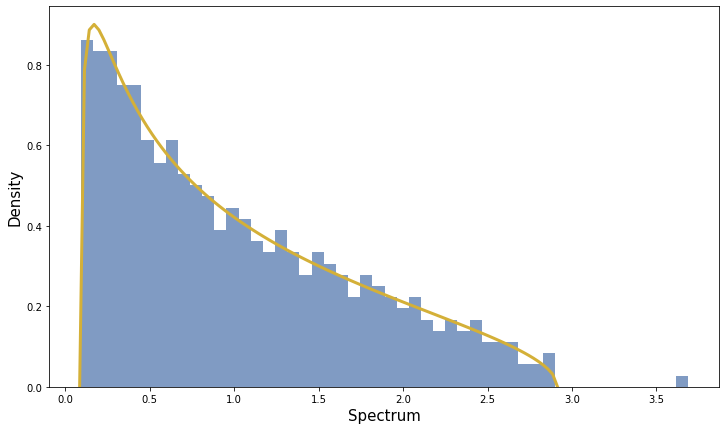

In [4]:
n = 1000
N = 500
c = N/n

u = np.random.normal(size=(N))
u = u / np.linalg.norm(u)

lambda_plus = (1 + sqrt(c))**2
lambda_moins = (1 - sqrt(c))**2
x = np.linspace(lambda_moins,lambda_plus,100)
xx = np.sqrt( (lambda_plus - x)*(x - lambda_moins) ) / (2*pi*c*x)

theta = 0.002 # 1.5*sqrt(c)/n

X_N = np.random.normal(loc=0.0, scale=1.0, size=(N,n))
R_N = (np.eye(N) + theta/n*u@u.T)

Sigma_N = 1/sqrt(n) * R_N**(1/2) @ X_N

matrix = Sigma_N @ Sigma_N.T

plt.figure(figsize=(12,7))
plt.plot(x, xx, color = metallic_gold, linewidth=3)
plt.hist(np.linalg.eigvals(matrix), color = glaucous_blue, bins = 50, density = True, alpha = 0.8)
plt.xlabel("Spectrum", fontsize = 15)
plt.ylabel("Density", fontsize = 15)
#plt.savefig("spike_distr.png")
plt.show()

## Circular law distribution of a random matrix

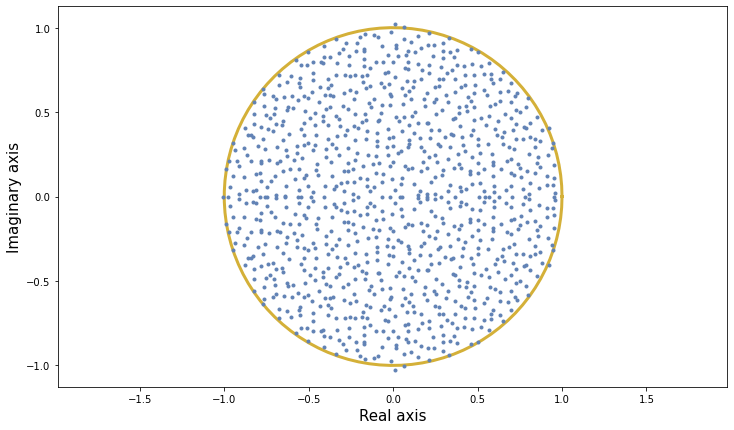

In [5]:
eig_B = np.linalg.eigvals(np.random.normal(loc=0.0, scale=1.0, size=(n,n)) / (sqrt(n)))
radius = 1  # radius of the circle.
t = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(12,7))
plt.plot(radius*np.cos(t), radius*np.sin(t), color = metallic_gold, linewidth = 3)
plt.plot(eig_B.real, eig_B.imag, '.', color = glaucous_blue)
plt.axis("equal")
plt.xlabel(r"Real axis", fontsize=15)
plt.ylabel("Imaginary axis", fontsize=15)
#plt.savefig("eigenvals_distr.png")
plt.show()

## Phase transition phenomenon for the P-property

### size of the interaction matrix and number of iterations (for MC estimator)

In [13]:
n = 100
nbr_iter = 50

### Symmetric case, interactions = $I - \frac{W}{\alpha \sqrt{n}}$

### Phase transition phenomenon (on p-property) for $\alpha = 2$

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [06:05<00:00, 24.36s/it]


W symmetric

Montecarlo over 50 estimations,
matrix shape 100x100

Rohn algorithm, cannot solve the p-matrix problem: 0 times 




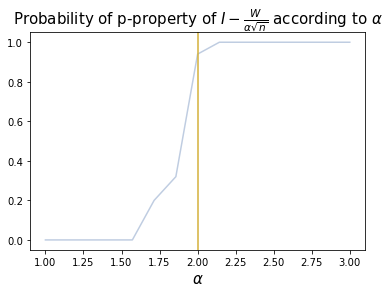

In [14]:
alphas = np.linspace(1,3,15)

alpha_p_matrix_proba = {}

pb = 0
cannot_solve = 0

for alpha in tqdm(alphas):
    total_computations = 0
    p_matrix_result = []
    while total_computations < nbr_iter:

        normalized_wigner = get_wigner((n,n)) / (alpha * sqrt(n))
        matrix = np.eye(n) - normalized_wigner

        output_rohn_v2, msg_rohn_v2 = p_matrix_Rohn_v2(matrix, False)
        if output_rohn_v2 == 1:
            output_rohn_v2 = True
        elif output_rohn_v2 == 0:
            output_rohn_v2 = False

        if output_rohn_v2 == -1:
            pb += 1
        else:
            total_computations += 1
            p_matrix_result.append(output_rohn_v2)

    alpha_p_matrix_proba[alpha] = np.sum( np.array(p_matrix_result).astype(int) ) / nbr_iter
    
print(r"W symmetric" "\n")
print(f"Montecarlo over {nbr_iter} estimations,\nmatrix shape {n}x{n}\n")
print(f"Rohn algorithm, cannot solve the p-matrix problem: {pb} times \n\n")

plt.plot(alpha_p_matrix_proba.keys(), alpha_p_matrix_proba.values(), alpha = 0.4, color = glaucous_blue)
plt.axvline(x = 2, linestyle = "-", color = metallic_gold)
plt.title(r"Probability of p-property of $I - \frac{W}{\alpha \sqrt{n}}$ according to $\alpha$", fontsize=15)
plt.xlabel(r"$\alpha$", fontsize=15)
plt.show();

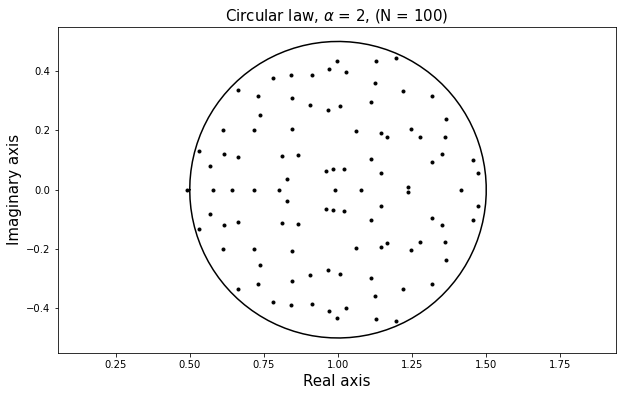

In [15]:
plot_spectrum(n=n, alpha=2)

### Non-symmetric case, interactions = $I - \frac{\Gamma}{\alpha \sqrt{n}}$

### Phase transition phenomenon (on p-property) for $\alpha = 1$

 53%|███████████████████████████████████████████▋                                      | 8/15 [06:15<13:02, 111.76s/it]

In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta


 67%|██████████████████████████████████████████████████████                           | 10/15 [18:40<20:43, 248.62s/it]

In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta


 73%|███████████████████████████████████████████████████████████▍                     | 11/15 [23:33<17:29, 262.31s/it]

In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta


 80%|████████████████████████████████████████████████████████████████▊                | 12/15 [29:13<14:17, 285.93s/it]

In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta


 87%|██████████████████████████████████████████████████████████████████████▏          | 13/15 [32:56<08:53, 266.81s/it]

In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta


 93%|███████████████████████████████████████████████████████████████████████████▌     | 14/15 [33:03<03:08, 188.43s/it]

In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta
In singularity_det_descent: PROBLEM -- Program run has been stopped after reaching prescribed number of iterations when looking for beta


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [33:11<00:00, 132.79s/it]


$\Gamma$ non symmetric

Montecarlo over 50 estimations,
matrix shape 100x100

Rohn algorithm, cannot solve the p-matrix problem: 27 times 




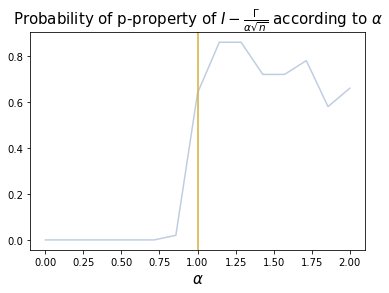

In [16]:
alphas = np.linspace(0.001,2,15)

alpha_p_matrix_proba = {}

pb = 0
cannot_solve = 0

for alpha in tqdm(alphas):
    total_computations = 0
    p_matrix_result = []
    while total_computations < nbr_iter:

        normalized_matrix = np.random.normal(loc=0.0, scale=1.0, size=(n,n)) / (alpha * sqrt(n))
        matrix = np.eye(n) - normalized_matrix

        output_rohn_v2, msg_rohn_v2 = p_matrix_Rohn_v2(matrix, False)
        if output_rohn_v2 == 1:
            output_rohn_v2 = True
        elif output_rohn_v2 == 0:
            output_rohn_v2 = False

        if output_rohn_v2 == -1:
            pb += 1
        else:
            total_computations += 1
            p_matrix_result.append(output_rohn_v2)

    alpha_p_matrix_proba[alpha] = np.sum( np.array(p_matrix_result).astype(int) ) / nbr_iter
    
print(r"$\Gamma$ non symmetric" "\n")
print(f"Montecarlo over {nbr_iter} estimations,\nmatrix shape {n}x{n}\n")
print(f"Rohn algorithm, cannot solve the p-matrix problem: {pb} times \n\n")

plt.plot(alpha_p_matrix_proba.keys(), alpha_p_matrix_proba.values(), alpha = 0.4, color = glaucous_blue)
plt.axvline(x = 1, linestyle = "-", color = metallic_gold)
plt.title(r"Probability of p-property of $I - \frac{\Gamma}{\alpha \sqrt{n}}$ according to $\alpha$", fontsize=15)
plt.xlabel(r"$\alpha$", fontsize=15)
plt.show();

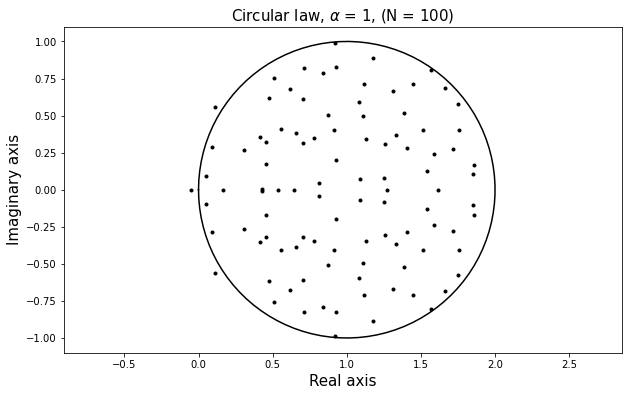

In [17]:
plot_spectrum(n=n, alpha=1)